<a href="https://colab.research.google.com/github/cswcjt/Time-Series-Analysis/blob/main/Aerial_Bombing(%EC%8B%A4%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EB%8B%A8%EB%B3%80%EB%9F%89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 과제: 날씨 데이터로 이상기후 파악하기

In [1]:
## 실습 데이터 소개
# https://www.kaggle.com/code/kanncaa1/time-series-prediction-tutorial-with-eda

## 데이터 설명
# Aerial Bombing Operations in WW2 (world-war-ii)
# / operations.csv: bombing operations
# Weather Conditions in WW2 (weatherww2)
# / Locations.csv: weather station locations, e.g., country, latitude, longitutde
# / Summary.csv: summary statistics of temperatures measured in weather stations  

- **Aerial Bombing Data** (`operations.csv`)
  - `Mission Date`: Date of mission
  - `Theater of Operations`: Region in which active military operations are in progress
  - `Country`: Country that makes mission or operation, e.g.,  USA
  - `Air Force`: Name or id of air force unity, e.g., 5AF
  - `Aircraft Series`: Model or type of aircraft, e.g., B24
  - `Callsign`: Before bomb attack, message, code, announcement, or tune that is broadcast by radio
  - `Takeoff Base`: Takeoff airport name, e.g., Ponte Olivo Airfield
  - `Takeoff Location`: Takeoff region, e.g., Sicily
  - `Takeoff Latitude`: Latitude of takeoff region
  - `Takeoff Longitude`: Longitude of takeoff region
  - `Target Country`: Target country, e.g., Germany
  - `Target City`: Target city, e.g., Berlin
  - `Target Type`: Type of target, e.g., city area
  - `Target Industry`: Target industy, e.g.,  town or urban
  - `Target Priority`: Target priority, e.g., 1 (most)
  - `Target Latitude`: Latitude of target
  - `Target Longitude`: Longitude of target
- **Weather Condition Data**
  - **Weather Station Locations** (`Locations.csv`)
    - `WBAN`: Weather station number
    - `NAME`: Weather station name
    - `STATE/COUNTRY ID`: Acronym of countries
    - `Latitude`: Latitude of weather station
    - `Longitude`: Longitude of weather station
  - **Weather Summary** (`Summary.csv`)
    - `STA`: Weather station number (WBAN)
    - `Date`: Date of temperature measurement
    - `MeanTemp`: Mean temperature


In [3]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True) 
import plotly.graph_objs as go 

import os
import warnings        
warnings.filterwarnings("ignore") 

In [16]:
filepath = 'https://github.com/mchoimis/tsdl/raw/main/weatherww2/'
summary = pd.io.parsers.read_csv(filepath + 'Summary.csv')
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [17]:
summary.head()
summary.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119039,82506,1945-12-31,0,NaN,29.444444,17.222222,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
filepath = 'https://github.com/mchoimis/tsdl/raw/main/world-war-ii/' # 'https://github.com/mchoimis/tsdl/raw/main/world-war-ii/'
operations = pd.io.parsers.read_csv(filepath + 'operations.csv')
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [20]:
operations.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


In [10]:
filepath = 'https://github.com/mchoimis/tsdl/raw/main/weatherww2/'
locations = pd.io.parsers.read_csv(filepath + 'Locations.csv')
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


In [21]:
aerial = operations.copy()
weather_station_location = locations.copy()
weather = summary.copy()

In [22]:
# Drop countries that are NaN
aerial = aerial[pd.isna(aerial.Country)==False]
# Drop if target longitude is NaN
aerial = aerial[pd.isna(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isna(aerial['Takeoff Longitude'])==False]
# Drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta

In [13]:
# 필요 컬럼만 추출
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [14]:
# 필요 컬럼만 추출
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


### EDA (탐색적 데이터 분석)

In [23]:
## 시계열 데이터의 시각화
# How many countries attacked
# Top 10 target countries
# Top 10 aircraft series
# Takeoff base locations (Attack countries)
# Target locations
# Theater of Operations
# Weather station locations

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


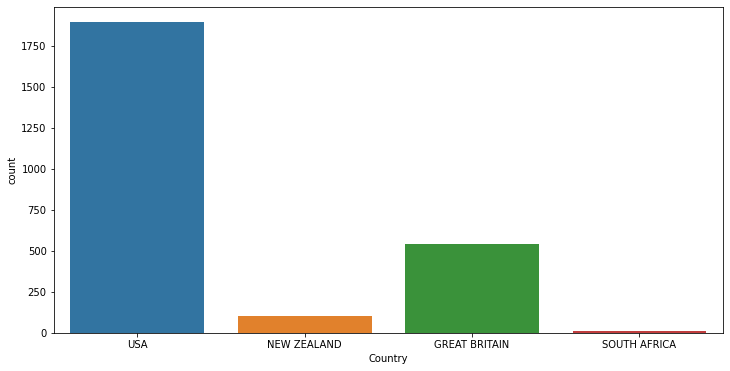

In [26]:
# How many countries attacked
print(aerial['Country'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(aerial['Country'])
plt.show()

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


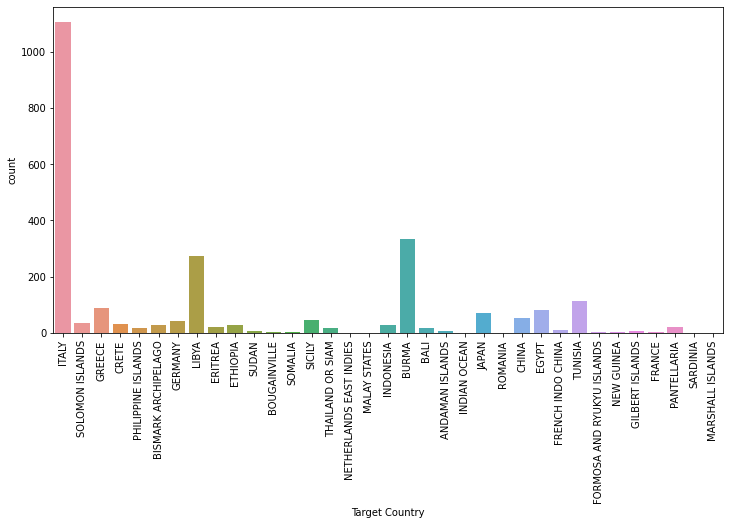

In [27]:
# Top 10 target countries
print(aerial['Target Country'].value_counts()[:10])
plt.figure(figsize=(12,6))
sns.countplot(aerial['Target Country'])
plt.xticks(rotation=90)
plt.show()

In [28]:
# Top 10 aircraft series
data = aerial['Aircraft Series'].value_counts()
print(data[:10])

A36             990
B25             416
B24             337
BLEN            180
LIB             145
WELL            129
B17             119
PV-1 VENTURA     70
WHIT             32
HALI             18
Name: Aircraft Series, dtype: int64


*   ETO: European Theater of Operations
* PTO: Pasific Theater of Operations
* MTO: Mediterranean Theater of Operations
* CBI: China-Burma-India Theater of Operations
* EAST AFRICA: East Africa Theater of Operations

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


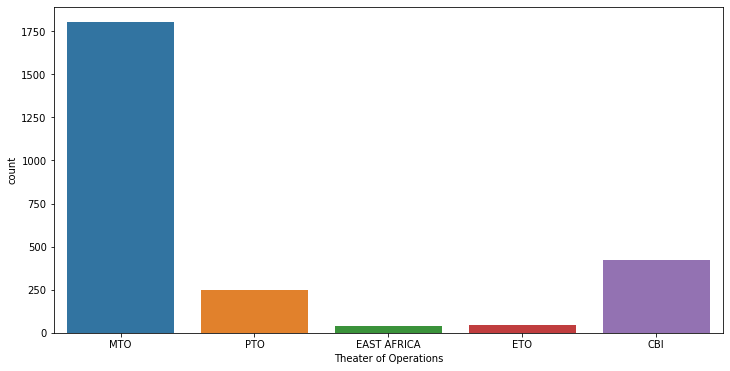

In [31]:
# Theater of Operations
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [ ]:
# During the war, the USA bombed BURMA from 1942 to 1945.
# The closest weather station to this war is BINDUKURI and has temperature records from 1943 to 1945.
# Before visualization, we need to make date features date time object.

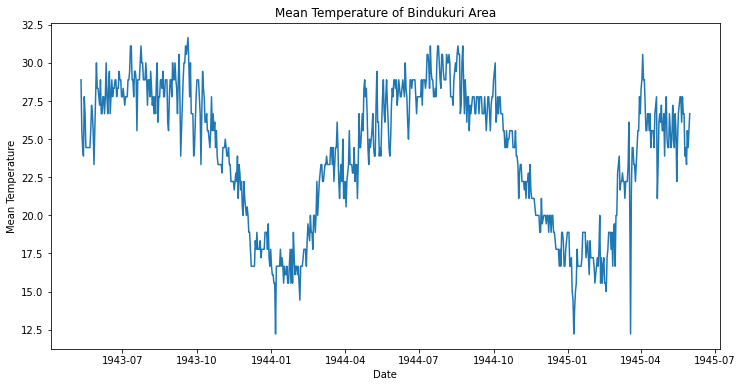

In [33]:
# 데이터 포인트 시각화 위하여 특정 지역 데이터만 추출하기 
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])

weather_bin

plt.figure(figsize=(12,6))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [34]:
# 시간 정보를 잘라서 연도, 월 정보 만들기
# Remember we put aerial = operations.copy() before.
operations["year"] = [ each.split("/")[2] for each in operations["Mission Date"]]
operations["month"] = [ each.split("/")[0] for each in operations["Mission Date"]]
operations = operations[operations["year"]>="1943"]
operations = operations[operations["month"]>="8"]

operations["Mission Date"] = pd.to_datetime(operations["Mission Date"])

# 특정 시점, 특정 지역 정보를 추출
attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = operations[operations.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [39]:
aerial_war.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,year,month,dene
3740,3741,1944-08-02,CBI,USA,10 AF,528 FS,P51,NaN,10,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30767.0,1944,8,[28.88888889]
10023,10024,1943-09-20,CBI,USA,10 AF,490 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30792.0,1943,9,[31.66666667]
10938,10939,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,30765.0,1943,9,[26.66666667]
10942,10943,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30766.0,1943,9,[26.66666667]
20891,20892,1944-08-17,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30809.0,1944,8,[30.55555556]


In [ ]:
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

- Green line is mean temperature that is measured in Bindukuri.
- Blue markers are bombing dates and bombing date temperature.
- As it can be seen from plot, USA bomb at high temperatures.
- The question is that can we predict future weather and according to this prediction can we know whether bombing will be done or not.
- In order to answer this question lets first start with time series prediction.

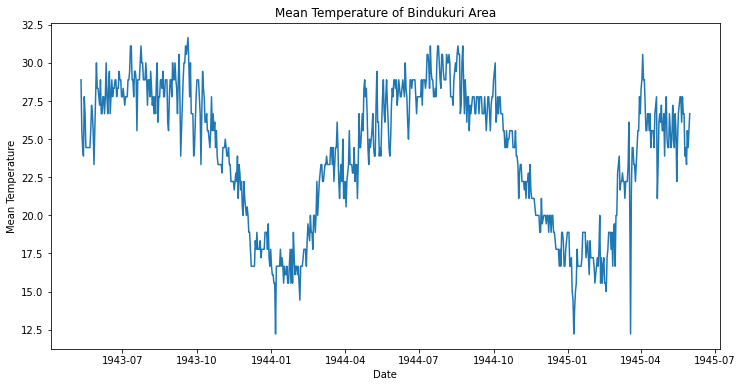

In [40]:
# Mean temperature of Bindukuri area
plt.figure(figsize=(12,6))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

In [41]:
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444
